# 📊 Online Retail E-Commerce Sales Analysis



## Project Overview
This project focuses on performing an **end-to-end data analysis** on an online retail e-commerce dataset.
The goal is to clean the raw data, analyze trends, visualize insights, and prepare business summaries.

---

#### Tools & Skills Used:
- Python (Pandas, NumPy)
- Data Cleaning & Feature Engineering
- Exploratory Data Analysis (EDA)
- Data Visualization (Matplotlib, Seaborn)
- Business Insight Generation

---

#### Dataset Information
- **Source:** Kaggle – Online Retail E-Commerce Dataset  
- **File Path:** `/kaggle/input/online-retail-ecommerce-dataset/data.csv`
- **Description:**  
  The dataset contains transactional data from an online retail store, including product details,
  quantities, prices, customer information, and country-level data.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ecommerce-dataset/data.csv


## STEP 1: Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## STEP 2: Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/online-retail-ecommerce-dataset/data.csv", encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


The dataset contains special characters like £, so ISO-8859-1 encoding is used. 

It has 8 columns including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.


## STEP 3: Data Understanding

In [4]:
#shape of dataset
df.shape

(541909, 8)

In [5]:
#Column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Missing values summary
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Basic statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### **Key Observations from Data**

- Dataset has **541,909 rows** and **8 columns** representing e-commerce transactions.
- Columns include: `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`.
- **Missing values:**  
  - `CustomerID`: 135,080 (~25%)  
  - `Description`: 1,454  
- **Numerical summary:**  
  - `Quantity`: -80,995 to 80,995 (negative values = returns)  
  - `UnitPrice`: -11,062 to 38,970  
- **Observations:**  
  - Dataset has missing values, negative quantities, and price outliers.  
  - `InvoiceDate` needs conversion to datetime for time-based analysis.  
- Ready for **data cleaning and feature engineering** in the next step.


## STEP 4: Data Cleaning

### 4.1 Check Missing Values

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 4.2 Handle Missing Values

In [9]:
# Drop rows with missing CustomerID and Description
df=df.dropna(subset=['CustomerID','Description'])

Observation:
- Rows with missing `CustomerID` and `Description` were removed, as these fields are essential for customer-level analysis.  
- This may slightly reduce total revenue but ensures accurate and reliable insights.


### 4.3 Handle Extreme Outliers in Quantity & UnitPrice

In [10]:
# Keep only valid sales transactions
df=df[(df['Quantity']>0) & (df['Quantity']<=1000)]
df=df[(df['UnitPrice']>0) & (df['UnitPrice']<=1000)]

In [11]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,397758.000000,397758.000000
mean,12.172572,2.989840
std,31.788318,6.995346
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,1000.000000,908.160000


Observation:
- Removed rows where:
  - Quantity <= 0 or Quantity > 1,000
  - UnitPrice <= 0 or UnitPrice > 1,000
- This removes unrealistic transactions (like PAPER CRAFT , LITTLE BIRDIE with 80,995 units).



### 4.4 Convert InvoiceDate

In [12]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

Observation:
- Converted `InvoiceDate` to datetime format for time-based analysis.


### 4.5 Create New Feature

In [13]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']


In [14]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

Observation:
- Calculated `TotalPrice` to ensure accurate revenue and average order value.
- Created `Month` and `Year` to do time-based analysis.

### 4.6 Remove Duplicates

In [15]:
df=df.drop_duplicates()

Observation:
- Removed duplicate records to avoid double counting.


### 4.7 Final Validation

In [16]:
df.isnull().sum(),df.shape

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 TotalPrice     0
 Year           0
 Month          0
 dtype: int64,
 (392567, 11))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392567 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392567 non-null  object        
 1   StockCode    392567 non-null  object        
 2   Description  392567 non-null  object        
 3   Quantity     392567 non-null  int64         
 4   InvoiceDate  392567 non-null  datetime64[ns]
 5   UnitPrice    392567 non-null  float64       
 6   CustomerID   392567 non-null  float64       
 7   Country      392567 non-null  object        
 8   TotalPrice   392567 non-null  float64       
 9   Year         392567 non-null  int32         
 10  Month        392567 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 32.9+ MB


In [18]:
df.to_csv("/kaggle/working/cleaned_online_retail.csv", index=False)


### Data Cleaning Result

- After all cleaning steps, the dataset contains **392,567 realistic transactions**.  
- Columns include `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`, `TotalPrice`, `Year`, and `Month`.  
- All missing values have been handled, negative and zero quantities/prices removed, and extreme outliers filtered.  
- `TotalPrice` has been recalculated to reflect cleaned transactions.  
- Data types are now appropriate for analysis, with `InvoiceDate` as datetime, numeric columns as float or int, and categorical columns as object.  
- This cleaned dataset is now **ready for reliable exploratory data analysis (EDA)**, revenue trends, product performance analysis, and business insights.


## STEP 5: Exploratory Data Analysis (EDA)

In this step, we explore the cleaned dataset to understand sales trends, customer behavior, and key business insights.

### Business Questions

1. What is the total revenue?
2. Which products generate the highest sales?
3. Which countries contribute the most to revenue?
4. How do sales trend over time (monthly)?
5. Which products generate the highest average order value?



### 5.1 Total Revenue

In [19]:
total_revenue = df['TotalPrice'].sum()
total_revenue

np.float64(8435776.564000001)

### Total Revenue

- The cleaned dataset contains **392,567 valid transactions**.  
- The **total revenue** generated is **8,435,776.56**.   
- This gives a reliable starting point for business analysis.


### 5.2 Top 10 Products by Revenue

In [20]:
top_products = (
    df.groupby('Description')['TotalPrice'].sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

Description
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER     87566.20
JUMBO BAG RED RETROSPOT                83060.54
POSTAGE                                69661.21
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          50497.03
CHILLI LIGHTS                          46265.11
RABBIT NIGHT LIGHT                     40030.04
PAPER CHAIN KIT 50'S CHRISTMAS         39983.13
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

### Top 10 Products by Revenue
  
  - `REGENCY CAKESTAND 3 TIER` is the top revenue-generating product, showing strong demand.  
  - Products like **WHITE HANGING HEART T-LIGHT HOLDER** and **JUMBO BAG RED RETROSPOT** also contribute significantly.  
  - These products should be prioritized for **inventory planning, promotions, and bundling strategies**.  
- **Actionable Note:** Target marketing and stock for these top products to maximize overall revenue.


### 5.3 Revenue by Country

In [21]:
country_sales = (
    df.groupby('Country')['TotalPrice'].sum()
    .sort_values(ascending=False)
    .head(10)
)
country_sales.apply(lambda x : f'{x:.2f}')

Country
United Kingdom    6878898.59
Netherlands        275523.78
EIRE               261657.72
Germany            228678.40
France             199475.89
Australia          137820.21
Spain               61558.56
Switzerland         56443.95
Belgium             41196.34
Sweden              38367.83
Name: TotalPrice, dtype: object

### Top 10 Countries by Revenue
 
  - The **United Kingdom** dominates sales, contributing the majority of revenue.  
  - Other European countries (Netherlands, EIRE, Germany, France) contribute smaller but significant portions.  
  - International sales are relatively low, suggesting opportunities for **targeted marketing and expansion** outside the UK.  
  - Understanding country-wise revenue helps in **strategic decisions for logistics, promotions, and regional campaigns**.


### 5.4 Monthly Sales Trend

In [22]:
monthly_sales = (
    df.groupby(['Year','Month'])['TotalPrice'].sum()
    .reset_index()
)
monthly_sales

,Year,Month,TotalPrice
0,2010,12,555094.910
1,2011,1,461825.890
2,2011,2,436484.080
3,2011,3,586944.700
4,2011,4,438360.151
5,2011,5,660181.020
6,2011,6,659032.800
7,2011,7,596842.141
8,2011,8,634594.720
9,2011,9,929187.302


In [23]:
monthly_sales_sorted = monthly_sales.sort_values(
    by="TotalPrice",
    ascending=False
)
monthly_sales_sorted

,Year,Month,TotalPrice
11,2011,11,1140029.830
10,2011,10,1003112.240
9,2011,9,929187.302
5,2011,5,660181.020
6,2011,6,659032.800
8,2011,8,634594.720
7,2011,7,596842.141
3,2011,3,586944.700
0,2010,12,555094.910
1,2011,1,461825.890


### Monthly Sales Trends

- Monthly sales show clear **seasonal patterns** across 2010–2011.  
- **Highest revenue** was recorded in **November 2011** (1,140,029.83), indicating strong seasonal demand, likely due to holiday shopping.  
- **October 2011** (1,003,112.24) and **September 2011** (929,187.30) also had high sales, suggesting a peak sales period in the second half of the year.  
- **Lowest revenue** occurred in **February 2011** (436,484.08) and **December 2011** (334,086.78), indicating slower sales at the start of the year and a possible partial month in the dataset.  
- **Insights:**  
  - These trends highlight the importance of **seasonal promotions, inventory planning, and marketing campaigns**.  
  - Business strategies can focus on maximizing sales during high-revenue months and preparing for slower months.


### 5.5 Calculate AOV by Product

In [24]:
aov_product = (
    df.groupby('Description')
    .agg(
        total_revenue=('TotalPrice', 'sum'),
        total_orders=('InvoiceNo', 'nunique')
    )
)

aov_product['AOV'] = aov_product['total_revenue'] / aov_product['total_orders']

top_aov_products = aov_product.sort_values('AOV', ascending=False).head(10)
top_aov_products


,total_revenue,total_orders,AOV
Description,,,
PICNIC BASKET WICKER 60 PIECES,39619.50,2,19809.750000
MISELTOE HEART WREATH CREAM,996.00,1,996.000000
SET/5 RED SPOTTY LID GLASS BOWLS,734.40,1,734.400000
HALL CABINET WITH 3 DRAWERS,2503.53,4,625.882500
POTTING SHED CANDLE CITRONELLA,1250.82,2,625.410000
WEEKEND BAG VINTAGE ROSE PAISLEY,527.85,1,527.850000
DOTCOM POSTAGE,6009.92,12,500.826667
UTILTY CABINET WITH HOOKS,2610.29,6,435.048333
VINTAGE POST OFFICE CABINET,607.65,2,303.825000


### Products with Highest Average Transaction Value

  - These products generate the **highest revenue per order**, even if total sales quantity is lower.  
  - **High AOV products** are ideal candidates for **upselling, promotions, and bundle deals** to maximize revenue per transaction.  
  - PICNIC BASKET WICKER 60 PIECES stands out as a premium item contributing significantly to per-order revenue.  
- **Actionable Note:** Focus marketing strategies and highlight high AOV products to increase overall profitability.

## STEP 6: Data Visualization

### Objective

The goal of this step is to visually explore sales trends, product performance, customer behavior, and geographic distribution after completing data cleaning and EDA.

### 6.1 Monthly Revenue Trend

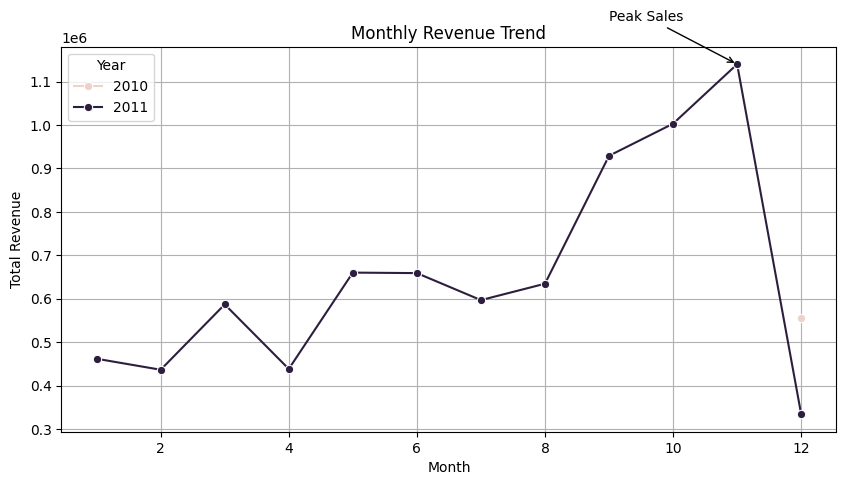

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data= monthly_sales.sort_values(['Year','Month']), x= 'Month', y= 'TotalPrice',
    hue= 'Year', marker= 'o'
)
# Highlight peak month (Nov 2011)
peak = monthly_sales.loc[monthly_sales['TotalPrice'].idxmax()]

plt.annotate(
    'Peak Sales',
    xy=(peak['Month'], peak['TotalPrice']),
    xytext=(peak['Month']-2, peak['TotalPrice']+100000),
    arrowprops=dict(arrowstyle='->')
)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Insights:
- Revenue steadily increases throughout 2011, indicating business growth.
  
- Sales peak in November 2011, highlighting strong seasonal demand.

- The annotated peak reinforces the importance of Q4 for revenue planning.

- Businesses can leverage this insight to optimize inventory and marketing
  strategies during high-demand periods.


### 6.2 Top 10 Products by Revenue

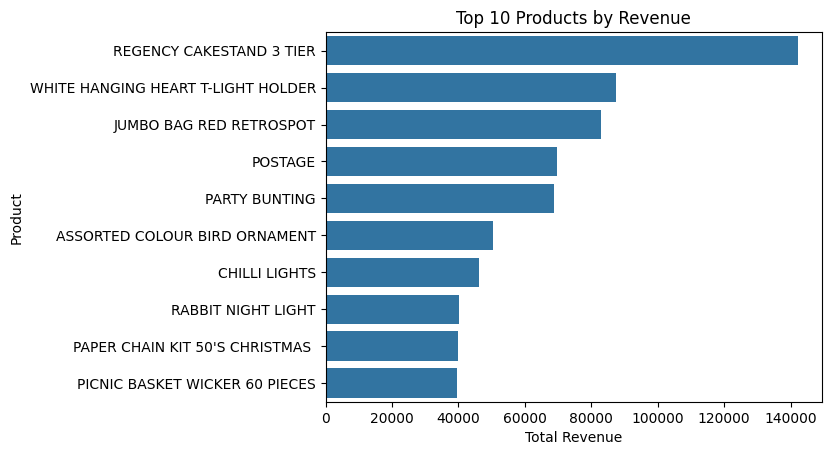

In [26]:
sns.barplot(
    x=top_products.values,
    y=top_products.index
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

Insights:

- A small number of products contribute a large share of total revenue.

- REGENCY CAKESTAND 3 TIER is the highest revenue-generating product.

- Gift and décor items dominate the top-performing products.

- These products can be prioritized for promotions and inventory planning.

### 6.3 Top 10 Countries by Revenue

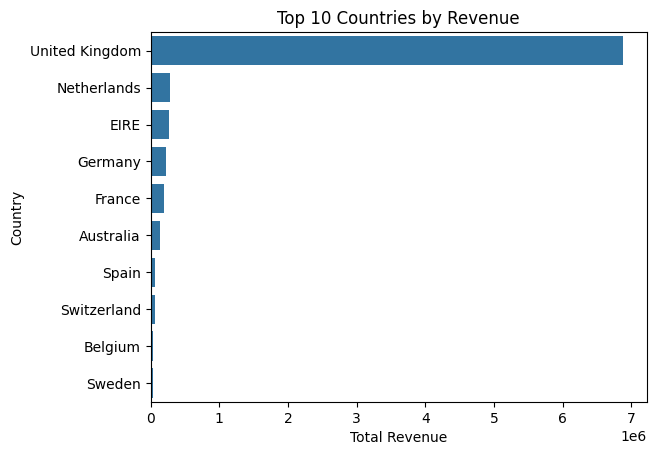

In [27]:
sns.barplot(
    x=country_sales.values,
    y=country_sales.index
)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

Insights:

- This suggests that marketing and inventory strategies should prioritize
the UK market while exploring growth opportunities in high-performing
European regions.


- European countries like Netherlands, EIRE, and Germany show strong performance.

- International markets present opportunities for expansion.

### 6.4 Top 10 Products by AOV

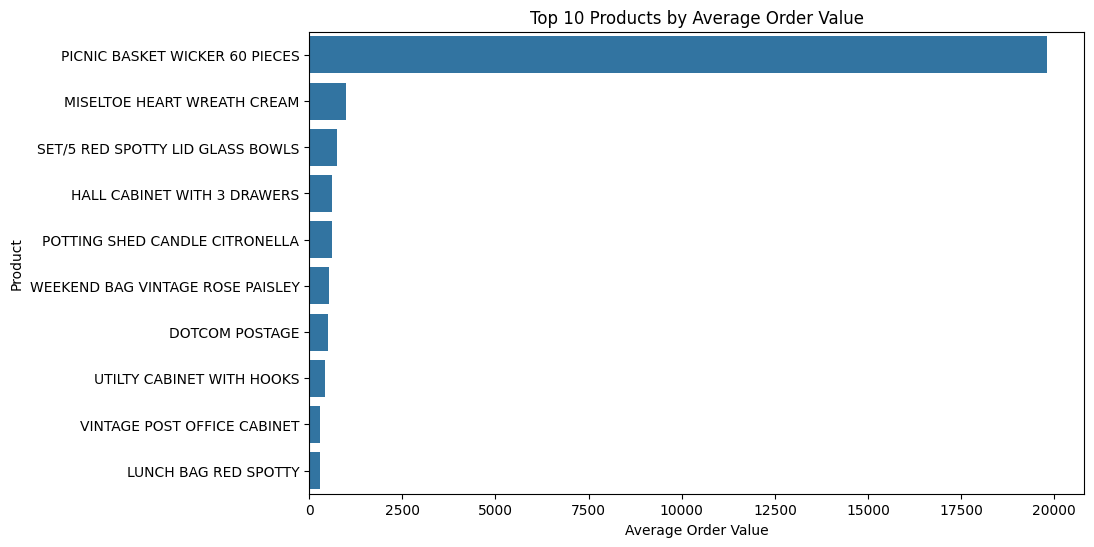

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_aov_products['AOV'],
    y=top_aov_products.index
)

plt.title('Top 10 Products by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Product')
plt.show()


Insights:
- The products with the highest AOV are typically premium or bulk-purchase items.
  
- These products generate higher revenue per order, even if purchased less frequently.

- High AOV products can be bundled with low-priced items to increase
overall cart value.


- Focusing on these products can improve overall revenue without increasing order volume.

- AOV analysis complements total revenue analysis by highlighting order-level profitability.



### 6.5 Quantity vs Unit Price (Scatter Plot)

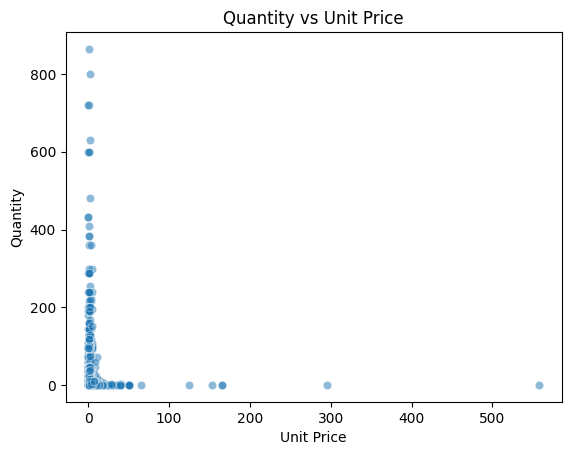

In [29]:
sns.scatterplot(
    data=df.sample(10000),
    x='UnitPrice',
    y='Quantity',
    alpha=0.5
)
plt.title('Quantity vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

Insights:

- Most transactions involve low-priced products sold in small quantities.

- Higher-priced items tend to be purchased in lower quantities.

- The absence of extreme outliers confirms effective data cleaning.

- This pattern reflects typical consumer purchasing behavior in retail.

- Understanding this relationship helps in pricing and inventory planning.

### Data Visualization

In this step, visual analysis was performed to explore sales trends, product performance,
customer purchasing behavior, and geographic distribution. The results reveal strong
seasonality, revenue concentration among top products, dominance of the UK market,
and the presence of high-value products suitable for targeted business strategies.
These insights support data-driven decision-making for sales and marketing optimization.


## STEP 7 Project Conclusion

This project analyzed online retail sales data using Python, Pandas,
Matplotlib, and Seaborn. After cleaning and preparing the data,
exploratory analysis revealed strong seasonality, product revenue
concentration, dominance of the UK market, and the presence of
high-value products. These insights can help businesses improve
inventory planning, marketing strategies, and revenue optimization.
